# SageMaker Model Monitor - visualizing monitoring results


The prebuilt container from SageMaker computes a variety of statistics and evaluates constraints out of the box. This notebook demonstrates how you can visualize them. You can grab the ProcessingJob arn from the executions behind a MonitoringSchedule and use this notebook to visualize the results.

Let's import some python libraries that will be helpful for visualization

In [1]:
from IPython.display import HTML, display
import json
import os
import boto3

import sagemaker
from sagemaker import session
from sagemaker.model_monitor import MonitoringExecution
from sagemaker.s3 import S3Downloader

## Get Utilities for Rendering

The functions for plotting and rendering distribution statistics or constraint violations are implemented in a `utils` file so let's grab that.

In [2]:
!wget https://raw.githubusercontent.com/awslabs/amazon-sagemaker-examples/master/sagemaker_model_monitor/visualization/utils.py

import utils as mu

--2020-10-13 13:16:23--  https://raw.githubusercontent.com/awslabs/amazon-sagemaker-examples/master/sagemaker_model_monitor/visualization/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.64.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.64.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12655 (12K) [text/plain]
Saving to: ‘utils.py.1’

utils.py.1          100%[===================>]  12.36K  --.-KB/s    in 0s      

2020-10-13 13:16:24 (87.1 MB/s) - ‘utils.py.1’ saved [12655/12655]



## Get Execution and Baseline details from Processing Job Arn

Enter the ProcessingJob arn for an execution of a MonitoringSchedule below to get the result files associated with that execution

In [3]:
processing_job_arn = "arn:aws:sagemaker:us-east-1:211147541504:processing-job/model-monitoring-202010131300-fd73556b01176adb4763906b" 

In [4]:
execution = MonitoringExecution.from_processing_arn(sagemaker_session=session.Session(), processing_job_arn=processing_job_arn)
exec_inputs = {inp['InputName']: inp for inp in execution.describe()['ProcessingInputs']}
exec_results = execution.output.destination

In [5]:
baseline_statistics_filepath = exec_inputs['baseline']['S3Input']['S3Uri'] if 'baseline' in exec_inputs else None
execution_statistics_filepath = os.path.join(exec_results, 'statistics.json')
violations_filepath = os.path.join(exec_results, 'constraint_violations.json')

baseline_statistics = json.loads(S3Downloader.read_file(baseline_statistics_filepath)) if baseline_statistics_filepath is not None else None
execution_statistics = json.loads(S3Downloader.read_file(execution_statistics_filepath))
violations = json.loads(S3Downloader.read_file(violations_filepath))['violations']

## Overview

The code below shows the violations and constraint checks across all features in a simple table.

In [6]:
mu.show_violation_df(baseline_statistics=baseline_statistics, latest_statistics=execution_statistics, violations=violations)

,data_type,completeness,baseline_drift,categorical_values
Account Length,Integral,100.00%,N/A,N/A
Area Code_408,Fractional,100.00%,N/A,N/A
Area Code_415,Fractional,100.00%,N/A,N/A
Area Code_510,Fractional,100.00%,N/A,N/A
Churn,Fractional,100.00%,N/A,N/A
CustServ Calls,Integral,100.00%,N/A,N/A
Day Calls,Integral,100.00%,N/A,N/A
Day Mins,String,100.00%,N/A,N/A
Eve Calls,Integral,100.00%,N/A,N/A
Eve Mins,Fractional,100.00%,N/A,N/A


## Distributions

This section visualizes the distribution and renders the distribution statistics for all features

In [7]:
features = mu.get_features(execution_statistics)
feature_baselines = mu.get_features(baseline_statistics)

,num_present,num_missing,mean,sum,std_dev,min,max
Churn,14276,0,0.146372,2.089607e+03,0.272116,0.006144,0.989564
Account Length,14276,0,99.765340,1.424250e+06,39.237503,10.000000,232.000000
VMail Message,14276,0,7.923585,1.131171e+05,13.387408,0.000000,44.000000
Day Calls,14276,0,101.614458,1.450648e+06,19.350388,36.000000,158.000000
Eve Mins,14276,0,203.764157,2.908937e+06,50.446925,67.000000,350.500000
...,...,...,...,...,...,...,...
Area Code_510,14276,0,0.256178,3.657200e+03,0.436733,0.000000,1.200000
Int'l Plan_no,14276,0,0.922268,1.316630e+04,0.268310,0.000000,1.300000
Int'l Plan_yes,14276,0,0.078379,1.118940e+03,0.268411,0.000000,1.000000
VMail Plan_no,14276,0,0.719487,1.027140e+04,0.449730,0.000000,1.400000


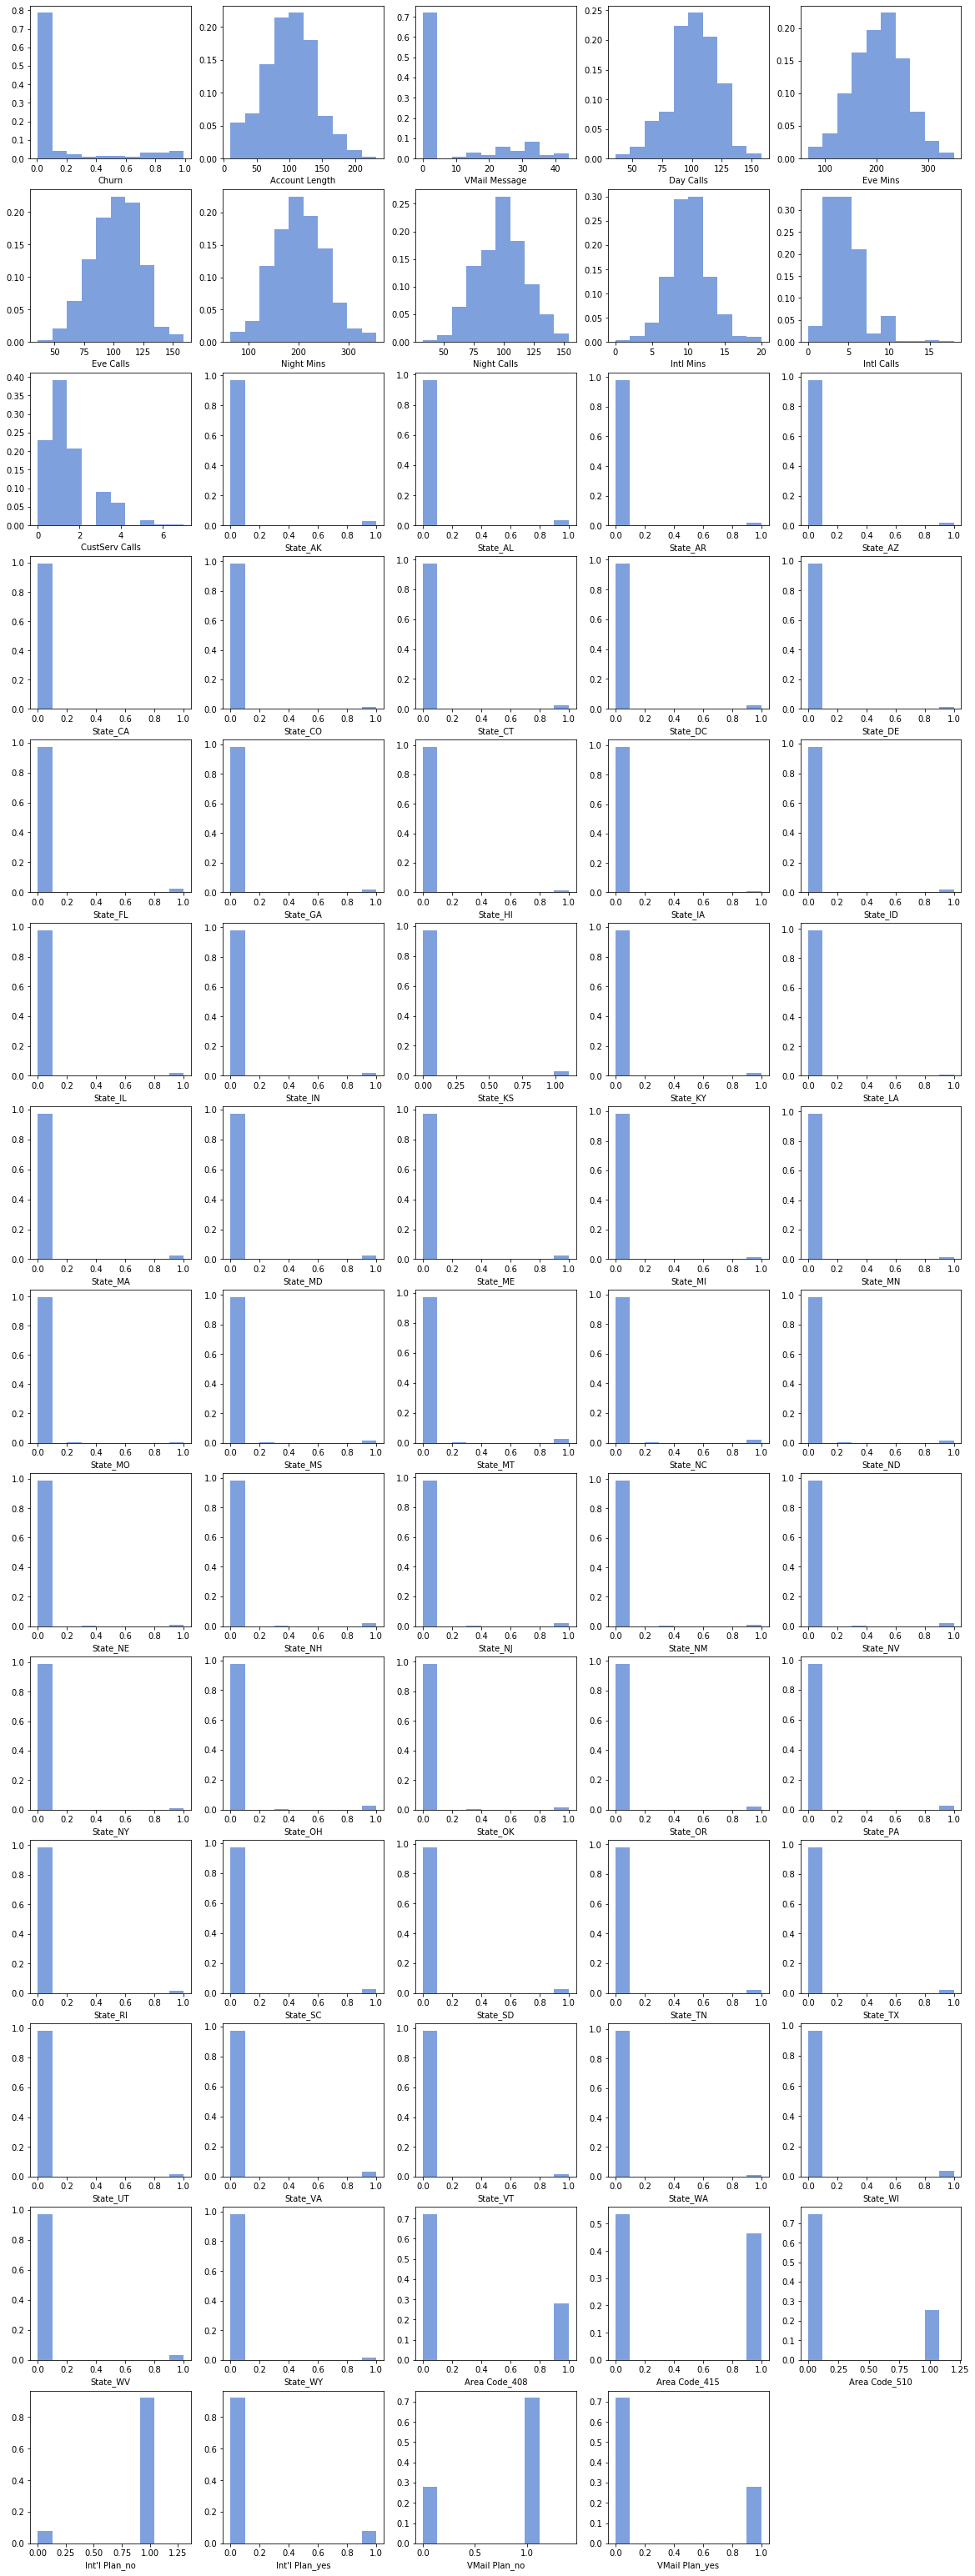

,num_present,num_missing,distinct_count
Day Mins,14276,0,343.0


RuntimeError: libpng signaled error

<Figure size 1440x0 with 1 Axes>

In [8]:
mu.show_distributions(features)

### Execution Stats vs Baseline

,num_present,num_missing,mean,sum,std_dev,min,max
Churn,14276,0,0.146372,2.089607e+03,0.272116,0.006144,0.989564
Account Length,14276,0,99.765340,1.424250e+06,39.237503,10.000000,232.000000
VMail Message,14276,0,7.923585,1.131171e+05,13.387408,0.000000,44.000000
Day Calls,14276,0,101.614458,1.450648e+06,19.350388,36.000000,158.000000
Eve Mins,14276,0,203.764157,2.908937e+06,50.446925,67.000000,350.500000
...,...,...,...,...,...,...,...
Area Code_510,14276,0,0.256178,3.657200e+03,0.436733,0.000000,1.200000
Int'l Plan_no,14276,0,0.922268,1.316630e+04,0.268310,0.000000,1.300000
Int'l Plan_yes,14276,0,0.078379,1.118940e+03,0.268411,0.000000,1.000000
VMail Plan_no,14276,0,0.719487,1.027140e+04,0.449730,0.000000,1.400000


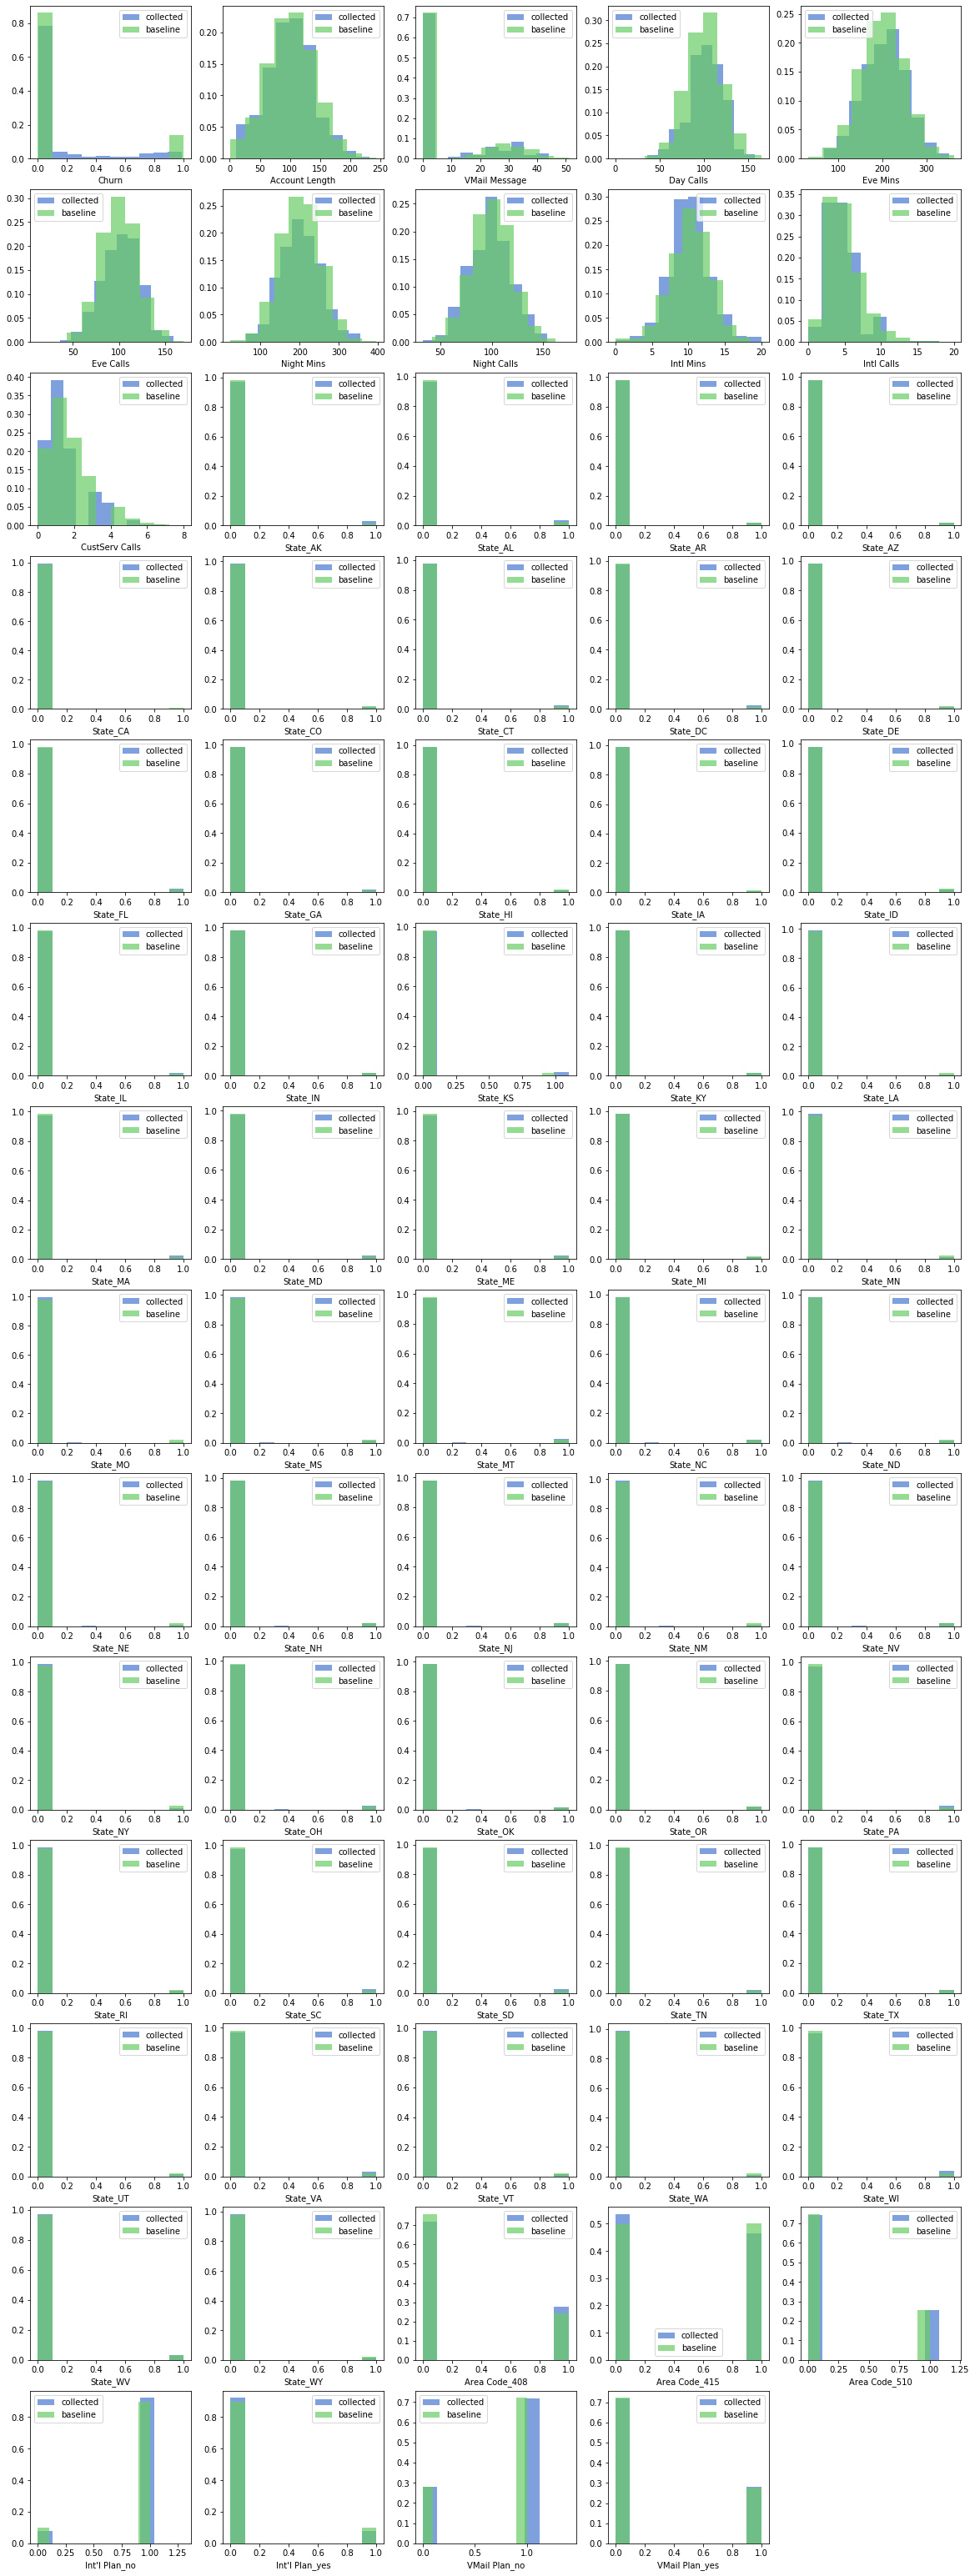

,num_present,num_missing,distinct_count
Day Mins,14276,0,343.0


RuntimeError: libpng signaled error

<Figure size 1440x0 with 1 Axes>

In [9]:
mu.show_distributions(features, feature_baselines)